### Import BuildingSimilarity

To use the BuildingSimilarity class it needs to be imported BuildingSimilarity.py that is in the root of the directory.
To do this we need to add the path to the root of directory to the environmental variable PATH. If you can't important the class with the code below you might want to check if you have the right path to the root directory.

In [1]:
import json
import sys
import nest_asyncio

path_to_building_similarity = ".." # important: it might be needed to change, but with the current file structure it is just ".."
sys.path.append(path_to_building_similarity)

from BuildingSimilarity import BuildingSimilarity


nest_asyncio.apply() # make sure we can run the asyncio loop in a jupyter notebook

with open('column_weights_example.json', 'r') as f: # load the column weights which are used to weight the columns in the similarity calculation
    column_weights = json.load(f)

Run the BuildingSimilarity class based on a neighborhood id (from the BAG)

In [2]:
bs = BuildingSimilarity(bag_data_folder='../data/cityjsons',
                        neighborhood_id="BU03071003",
                        verbose=False,
                        column_weights=column_weights,
                        feature_space_file='../data/feature_space/fs_amersfoort.csv')

bs.collection.collect_id_list()
bs.processing.run()

812 out of 825 files already exist, so 13 more request(s) are needed.


Calculating the 2D & 3D metrics: 100%|██████████| 808/808 [00:11<00:00, 69.87it/s] 
c:\Users\timos\OneDrive - HAN\Future Factory\FF_BuildingSimilarityIndex\demo\..\processing\turning_functions\main.py:286: RuntimeWarning: invalid value encountered in scalar divide
  angle = 360*np.arccos(np.dot(p1, p3)/(np.sqrt(np.dot(p1, p1))*np.sqrt(np.dot(p3, p3))))/(2*np.pi)
Executing the turning function : 100%|██████████| 610/610 [00:12<00:00, 49.39it/s]


## Similarity tests
The code below uses different techniques to find buildings that are similar to each other. The first cell runs a db_scan algorithm which clusters the data based on the DBscan algorithm. The second and the third cell create a distance matrix, useful to evaluate small sets of buildings

In [3]:
result_dbscan = bs.similarity.db_scan(eps=1, min_samples=4, na_mode='zero')
result_dbscan.value_counts('cluster')

cluster
-1    206
 3    169
 1    113
 7     42
 0     29
 8     17
 6     11
 2      8
 4      6
 5      5
 9      4
Name: count, dtype: int64

The two examples below create a distance matrix. Both examples provide the BAG IDs directly to the BuildingSimilarity class, rather than using a "buurt ID". The first matrix creates a regular distance matrix, which displays the distance between every possible pair of buildings. The second matrix is a reference distance matrix which displays the distance between a set of reference buildings (specified by the reference_ids variable) and a set of other buildings (all buildings in all_ids but not in reference_ids). Both can be plotted as it is a small sets of buildings (less than 100 buildings), otherwise only the returned matrix can be used.

All the requested data is already saved on the machine, no new requests are needed.


Calculating the 2D & 3D metrics: 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]
c:\Users\timos\OneDrive - HAN\Future Factory\FF_BuildingSimilarityIndex\demo\..\processing\turning_functions\main.py:286: RuntimeWarning: invalid value encountered in scalar divide
  angle = 360*np.arccos(np.dot(p1, p3)/(np.sqrt(np.dot(p1, p1))*np.sqrt(np.dot(p3, p3))))/(2*np.pi)
Executing the turning function : 100%|██████████| 12/12 [00:00<00:00, 36.90it/s]


Calculating distance matrix: 100%|██████████| 66/66 [00:00<00:00, 1378.06it/s]


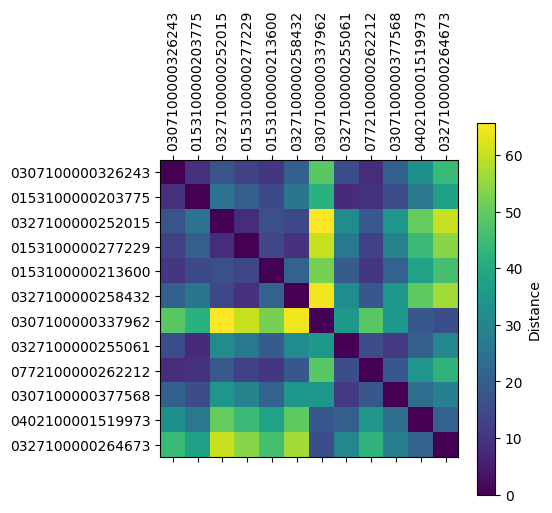

In [4]:
all_ids = ["0153100000203775", "0153100000277229", "0772100000262212",
        "0153100000213600", "0327100000255061", "0327100000258432",
        "0327100000252015", "0327100000264673", "0307100000377568",
        "0307100000326243", "0307100000337962", "0402100001519973"]


bs = BuildingSimilarity(bag_data_folder='../data/cityjsons',
                        all_ids=all_ids,
                        verbose=False,
                        column_weights=column_weights,
                        feature_space_file='../data/feature_space/fs_small.csv')

bs.collection.collect_id_list()
bs.processing.run()
mirrored_matrix = bs.similarity.distance_matrix_regular(dist_matrix_path='../data/results/dist_matrix_test.csv', plot_matrix=True) # note that the output below is from an example with only 10 buildings, which makes it feasible to plot the buildings

In [5]:
# define the reference and regular ids that are used in the reference distance matrix
reference_ids = ["0153100000203775", "0153100000277229", "0772100000262212",
        "0153100000213600", "0327100000255061", "0327100000258432",
        "0327100000252015", "0327100000264673", "0307100000377568",
        "0307100000326243", "0307100000337962", "0402100001519973"]

regular_ids = ["0003100000120810", "0003100000120830", "0003100000121533", "0003100000121594", "0003100000122877", "0003100000143712", "0005100000000893", "0005100000001817",
                "0005100000003501", "0005100000004208", "0005100000004411", "0005100000004523", "0005100000004874", "0005100000005116", "0005100000005215", "0005100000005324",
                "0005100000005623", "0005100000005711", "0005100000005894", "0005100000006000", "0005100000006047", "0007100000004048", "0007100000004902", "0007100000004956",
                "0007100000005182", "0007100000005204", "0009100007678070", "0009100007678364", "0009100007684652", "0010100000005236", "0010100000005800", "0010100000006128",
                "0010100000006727", "0010100000006980", "0010100000007149", "0010100000007255", "0010100000008333", "0010100000009748", "0010100000009974", "0010100000010160",
                "0010100000010827", "0010100000011655", "0010100000012086", "0010100000012130", "0010100000012332", "0010100000012617", "0010100000012722"]

all_ids = reference_ids + regular_ids

All the requested data is already saved on the machine, no new requests are needed.


Calculating the 2D & 3D metrics: 100%|██████████| 52/52 [00:04<00:00, 12.64it/s]
c:\Users\timos\OneDrive - HAN\Future Factory\FF_BuildingSimilarityIndex\demo\..\processing\turning_functions\main.py:286: RuntimeWarning: invalid value encountered in scalar divide
  angle = 360*np.arccos(np.dot(p1, p3)/(np.sqrt(np.dot(p1, p1))*np.sqrt(np.dot(p3, p3))))/(2*np.pi)
Calculating distance matrix: 100%|██████████| 480/480 [00:00<00:00, 1411.53it/s]


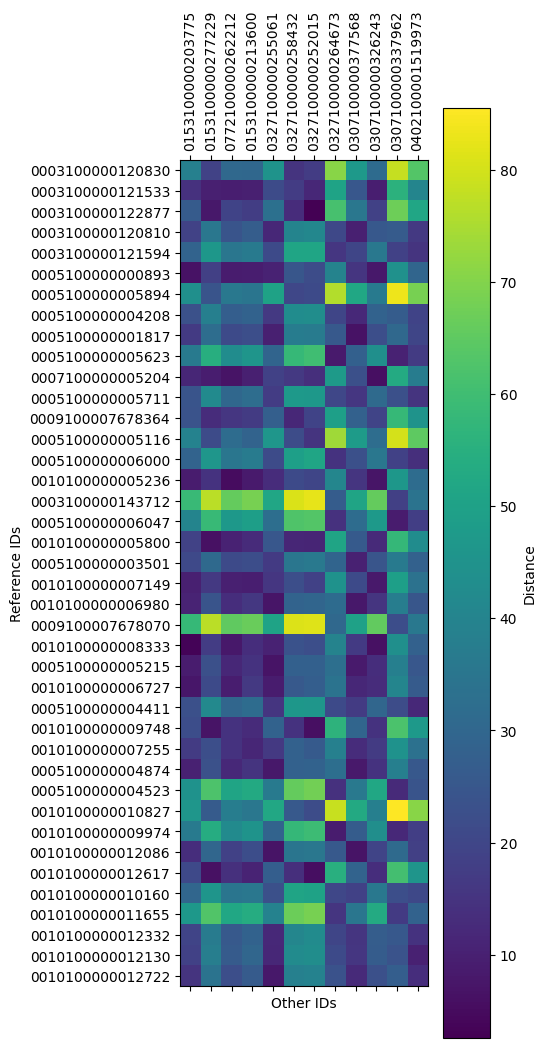

In [6]:
bs = BuildingSimilarity(bag_data_folder='../data/cityjsons',
                        all_ids=all_ids,
                        verbose=False,
                        column_weights=column_weights,
                        feature_space_file='../data/feature_space/fs_ref.csv')

bs.collection.collect_id_list()
bs.processing.run()
mirrored_matrix = bs.similarity.distance_matrix_reference(dist_matrix_path='../data/results/dist_matrix_test.csv',
                                                          reference_ids=reference_ids,
                                                          plot_matrix=True)